In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import json

In [113]:
base_path = "C:/Users/simon/Downloads/Results/b64_7170samples/"
threshold = 73 # percent

In [102]:
def process_csv(csv_path, threshold, img_folder="."):
    """
    Mostra le immagini contenute nel DataFrame filtrato.
    
    Parametri:
        csv_path: il path al file csv contenente i risultati dei modelli
        img_folder (str): percorso della cartella che contiene le immagini
    """
    
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        thold = threshold/100
        df_filtrato = df[df["test_accuracy"] >= thold]
    

        if not df_filtrato.empty:
            for idx, row in df_filtrato.iterrows():
                img_name = os.path.basename(str(row['graph_image_name']))
                img_path = os.path.join(img_folder, img_name)
        
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    plt.figure(figsize=(15, 5))
                    plt.imshow(img)
                    plt.axis("off")
                    plt.title(f"Accuracy: {(row['test_accuracy'] * 100):.2f}% | File: {img_name}")
                    plt.show()
                else:
                    print(f"Immagine non trovata: {img_path}")

                # Estrai la matrice di confusione dal JSON
                cm = np.array(json.loads(df["confusion_matrix_json"].iloc[0]))
                
                # Mostra graficamente la matrice
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot(cmap="Blues", values_format="d")
                plt.title("Confusion Matrix")
                plt.show()
        else:
            print(f"Non ci sono buoni risultati")
    else:
        print(f"Il file {csv_path} non è stato trovato")


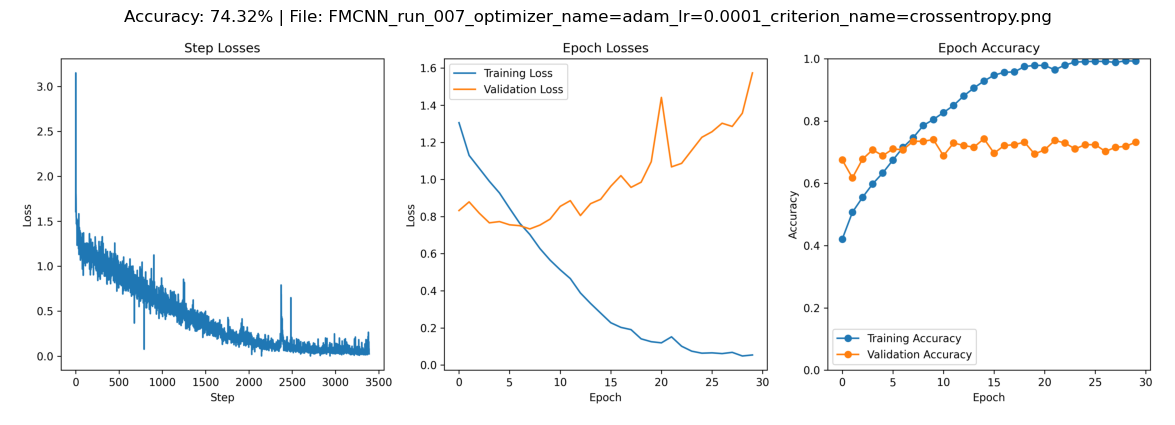

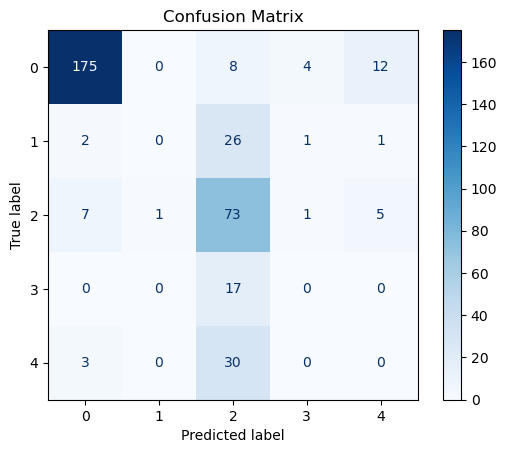

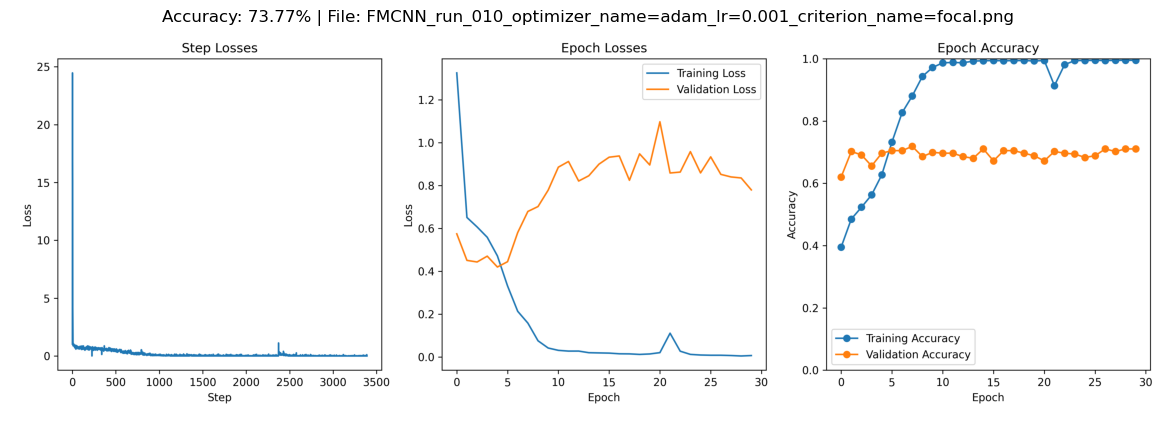

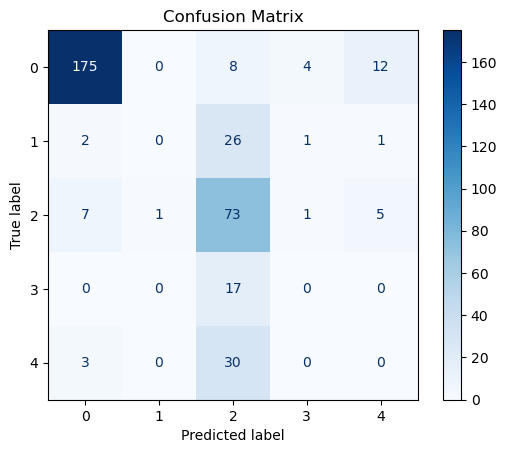

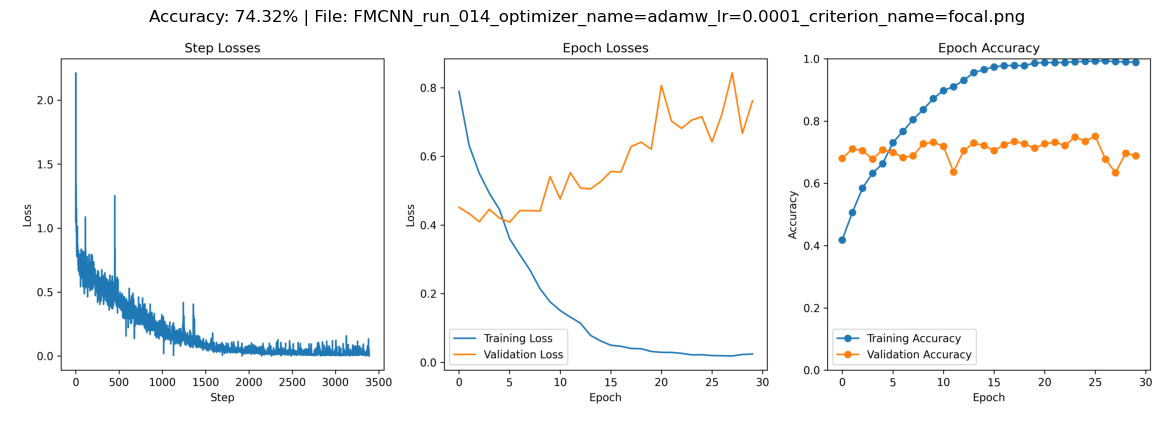

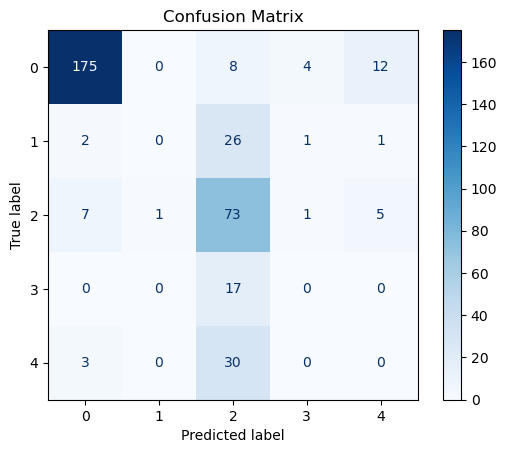

In [114]:
process_csv(csv_path = base_path+"FMCNN.csv", threshold = threshold, img_folder = base_path)

In [115]:
process_csv(csv_path = base_path+"vgg16.csv", threshold = threshold, img_folder = base_path)

Non ci sono buoni risultati


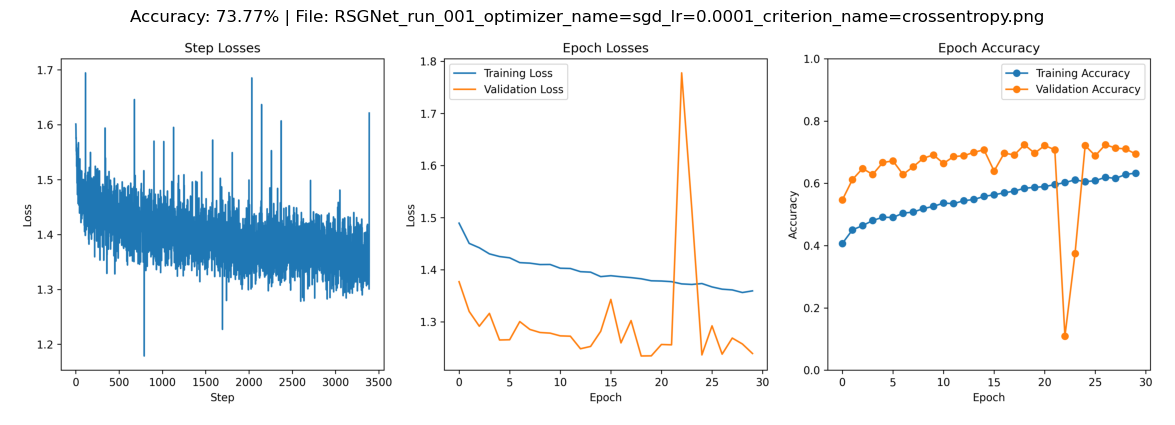

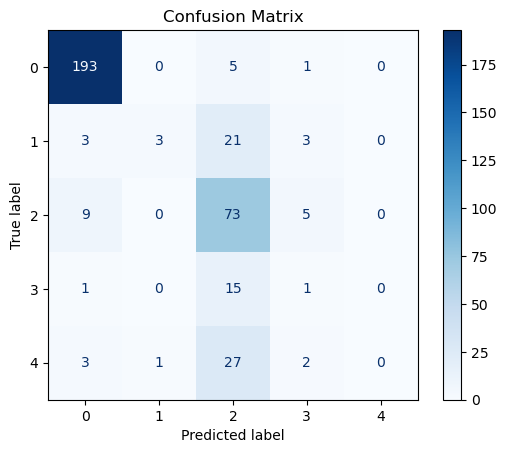

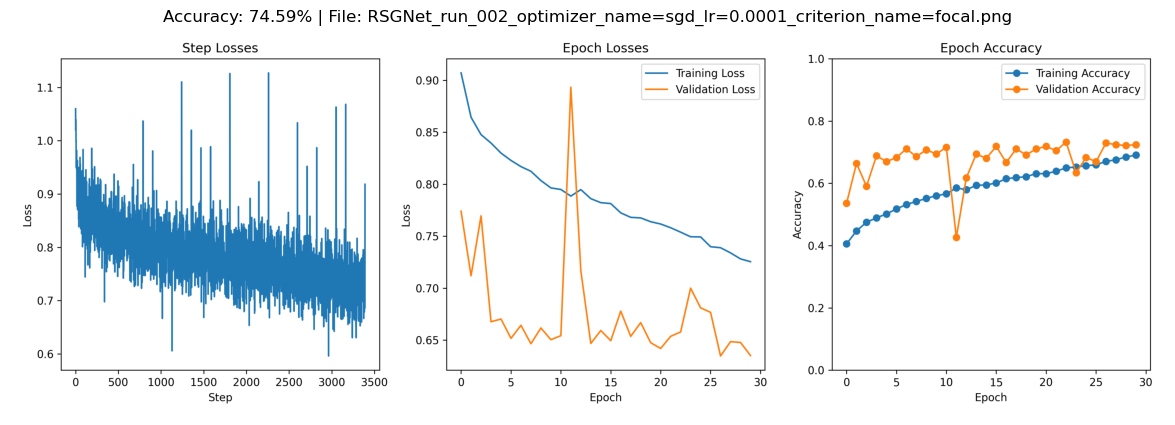

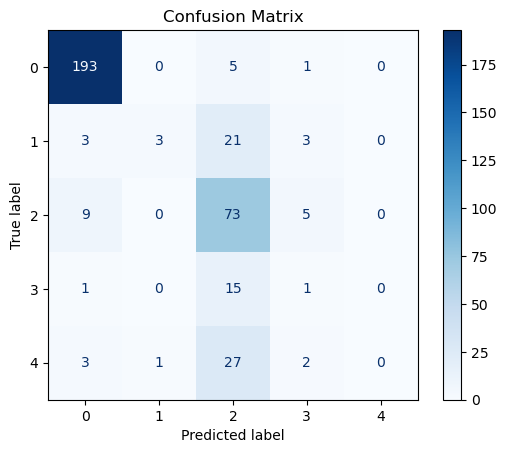

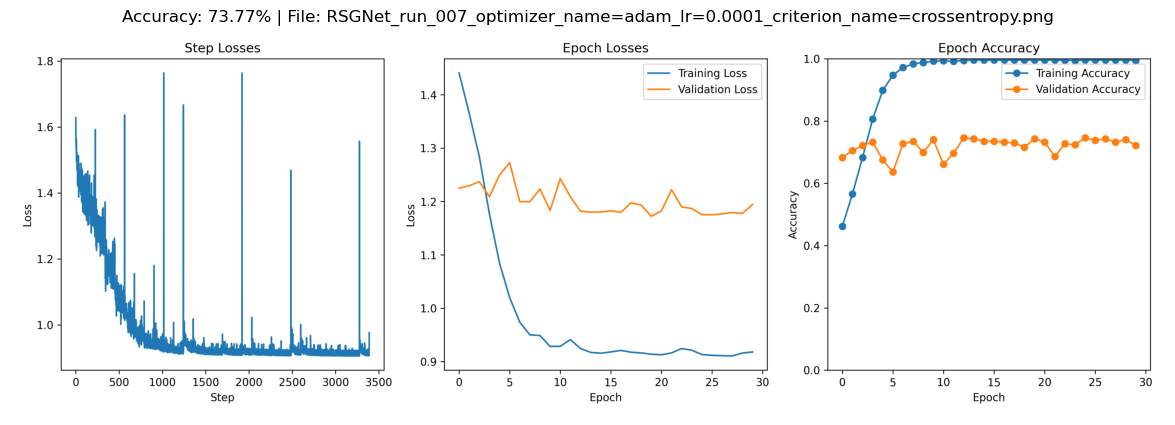

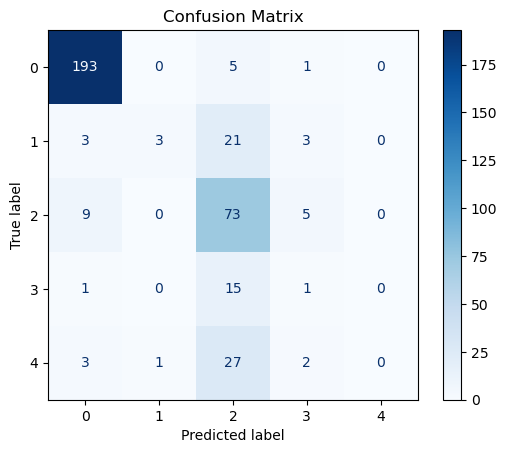

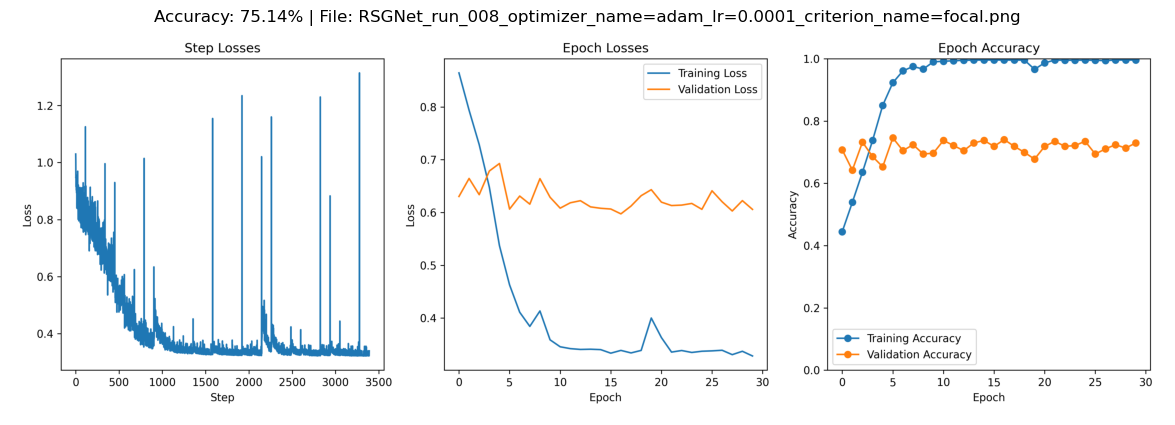

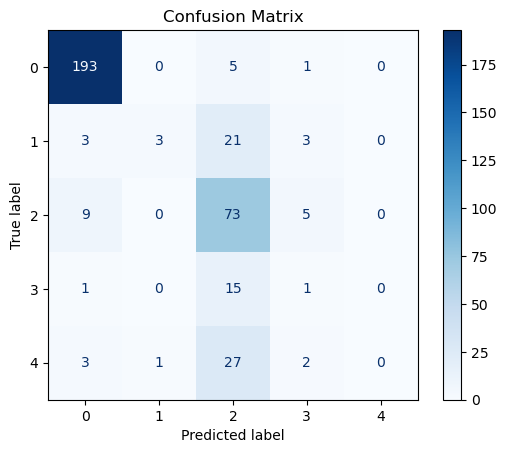

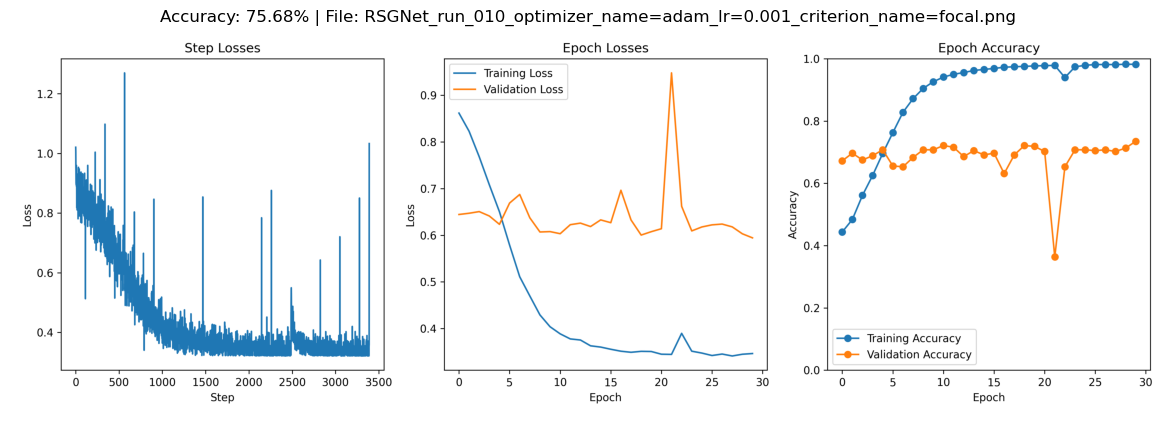

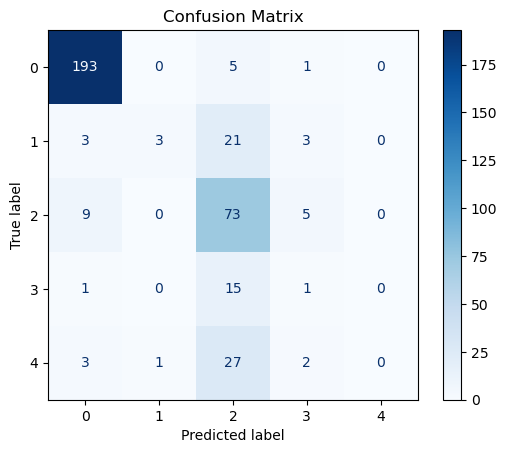

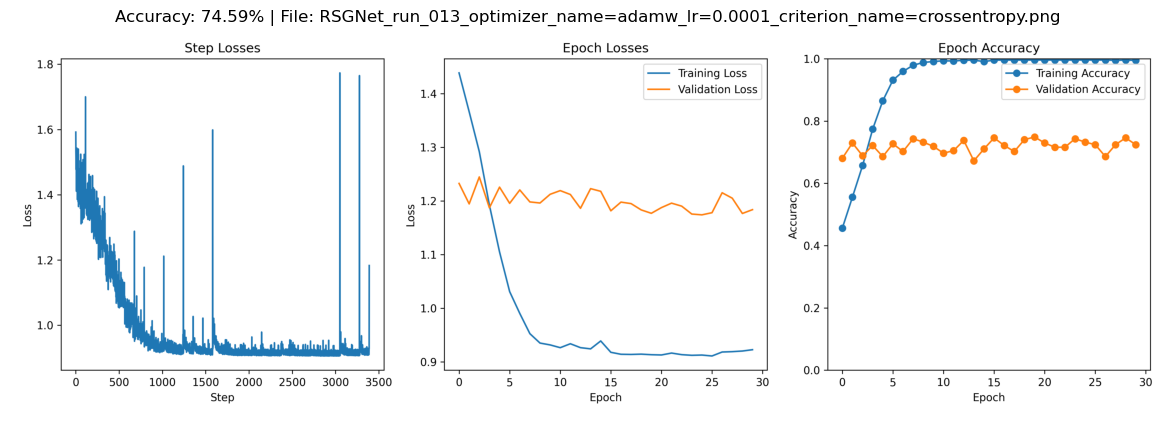

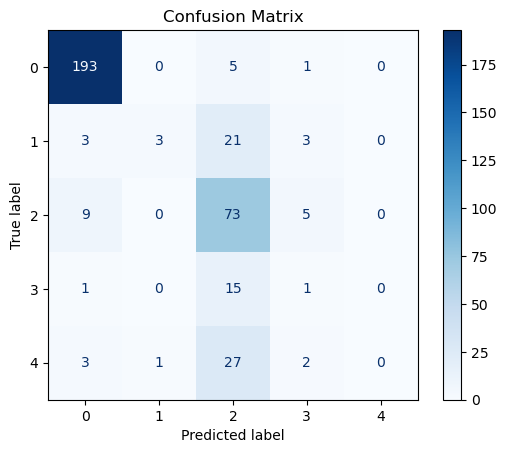

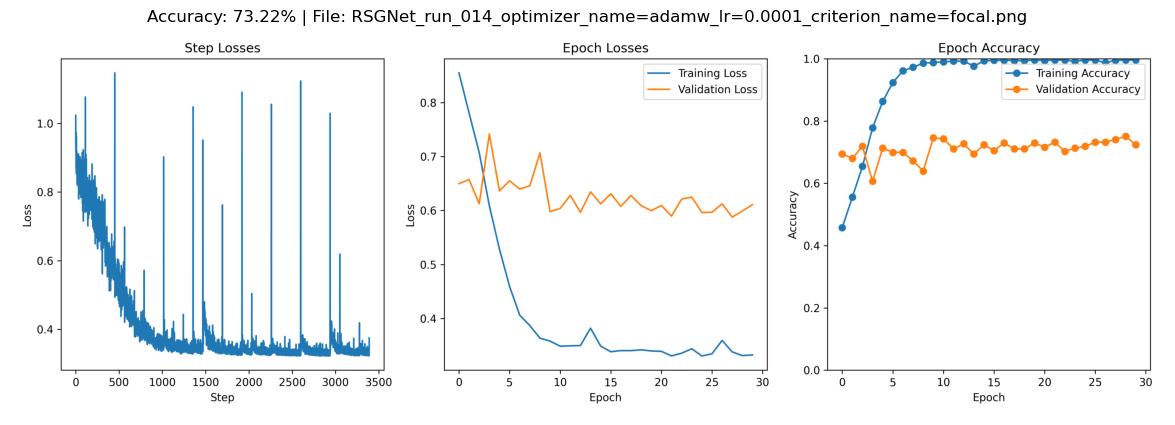

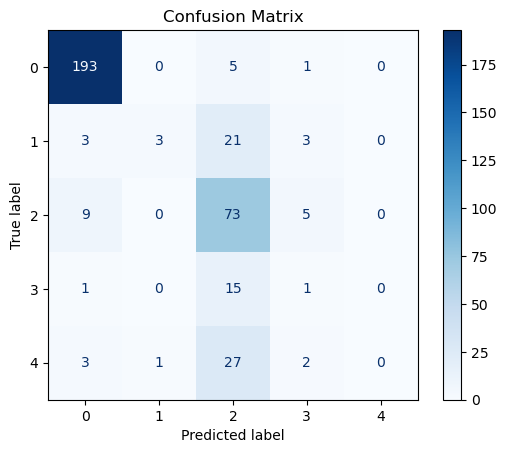

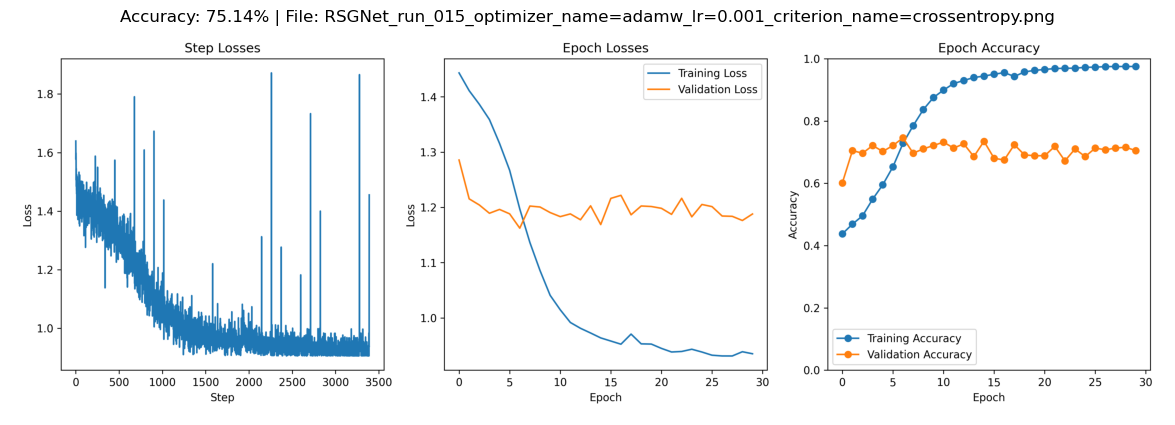

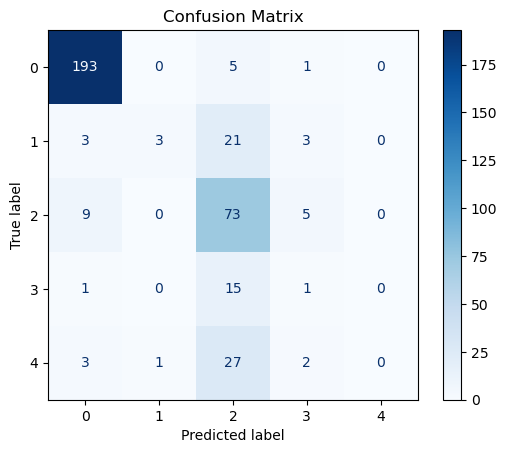

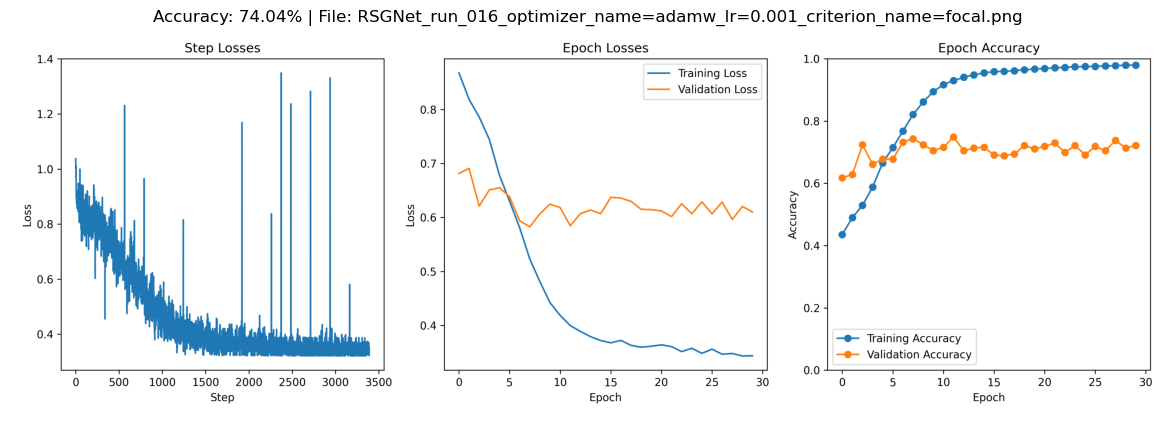

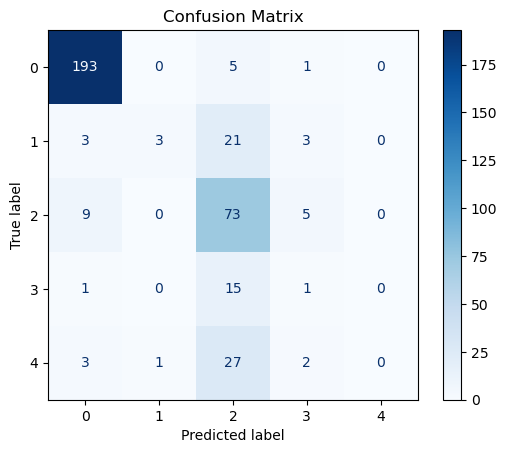

In [116]:
process_csv(csv_path = base_path+"RSGNet.csv", threshold = threshold, img_folder = base_path)

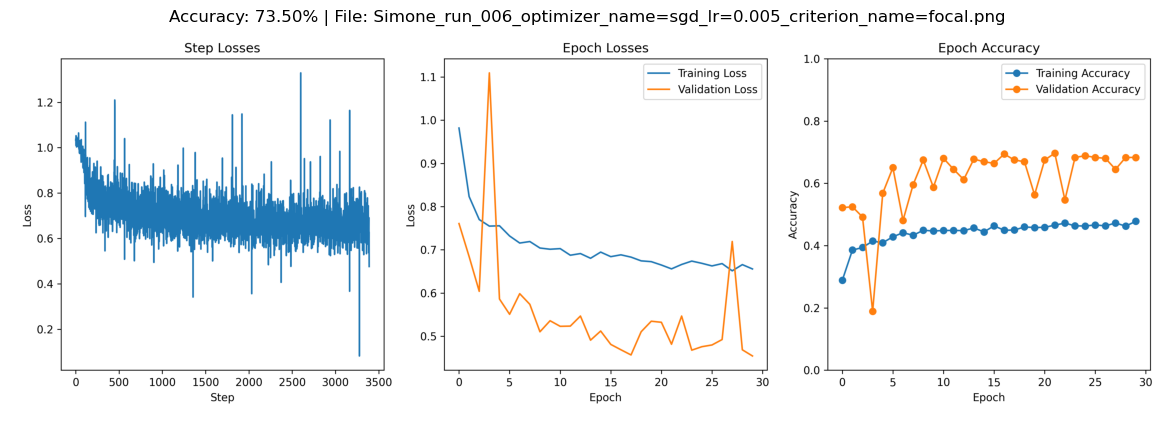

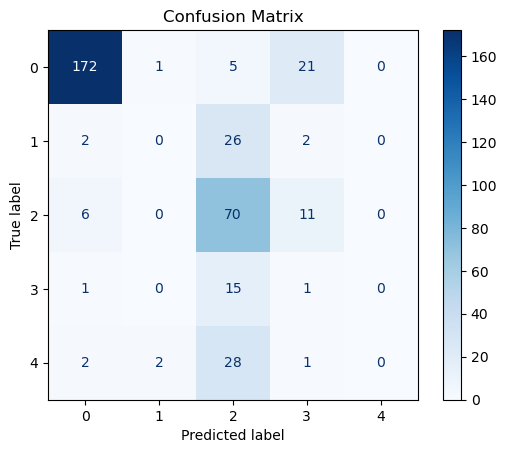

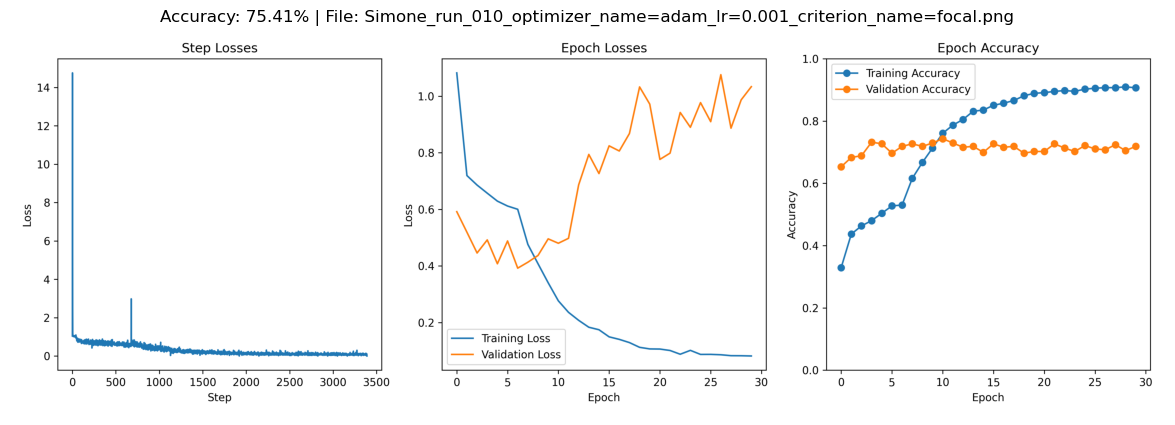

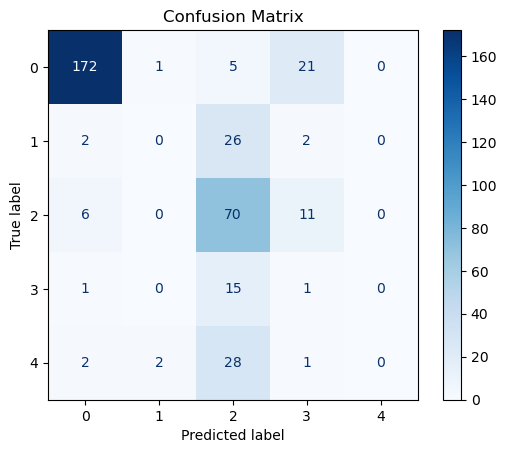

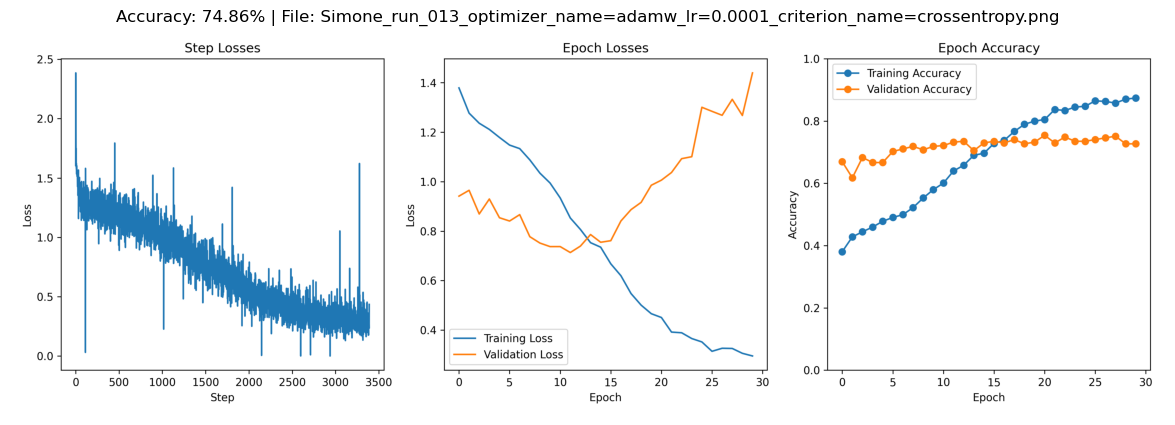

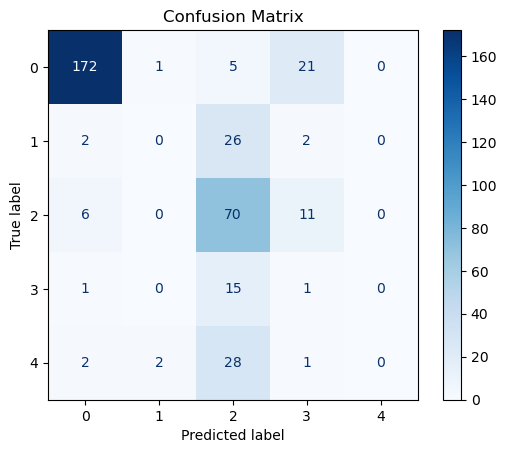

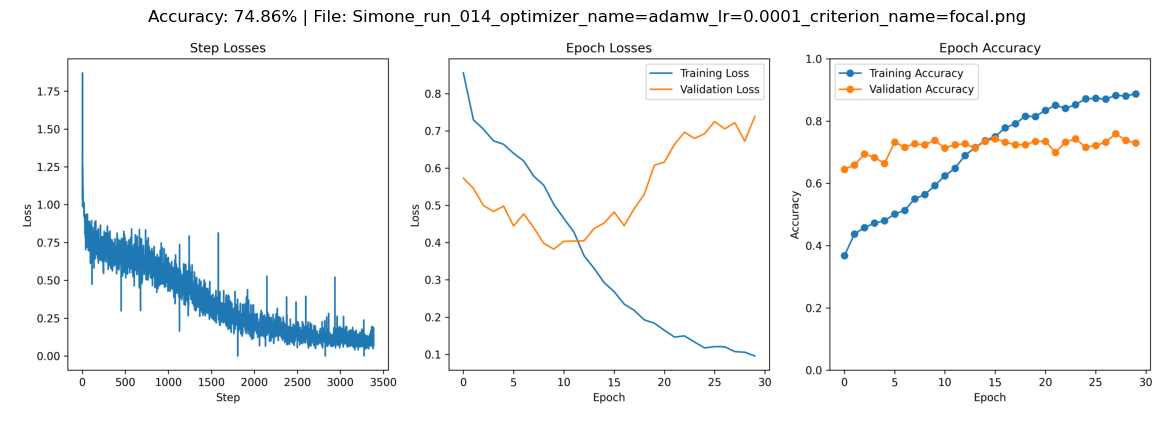

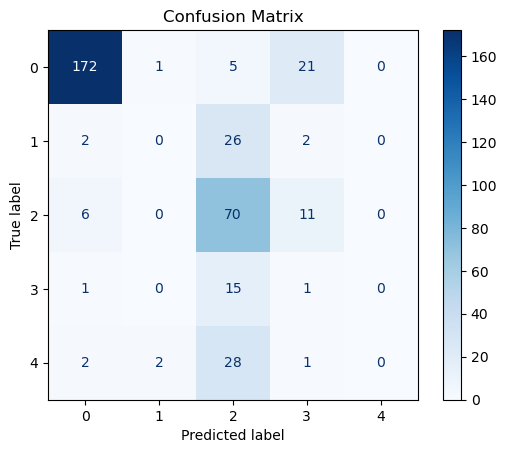

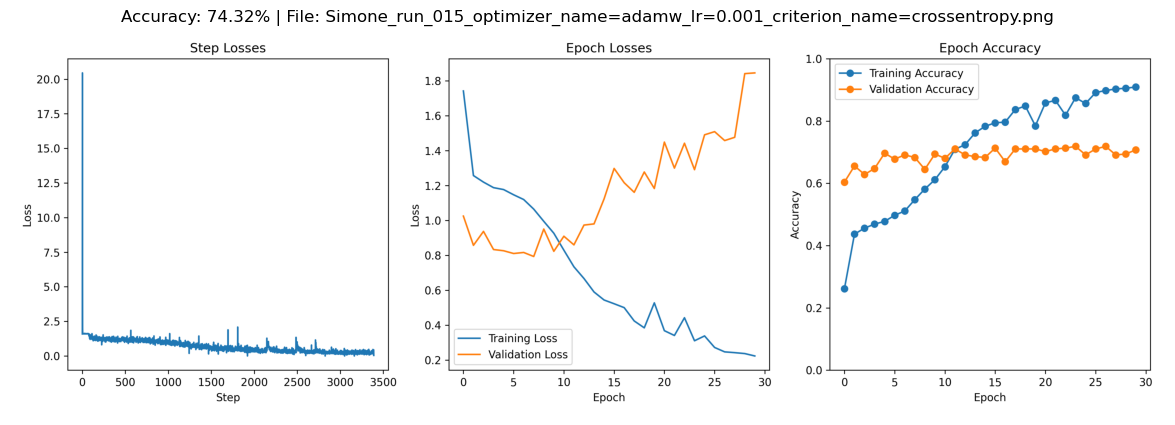

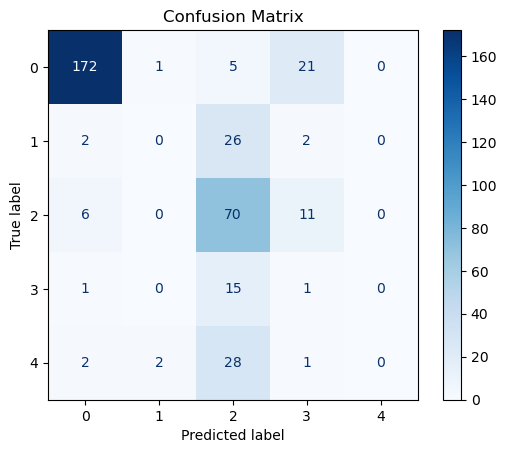

In [117]:
process_csv(csv_path = base_path+"Simone.csv", threshold = threshold, img_folder = base_path)

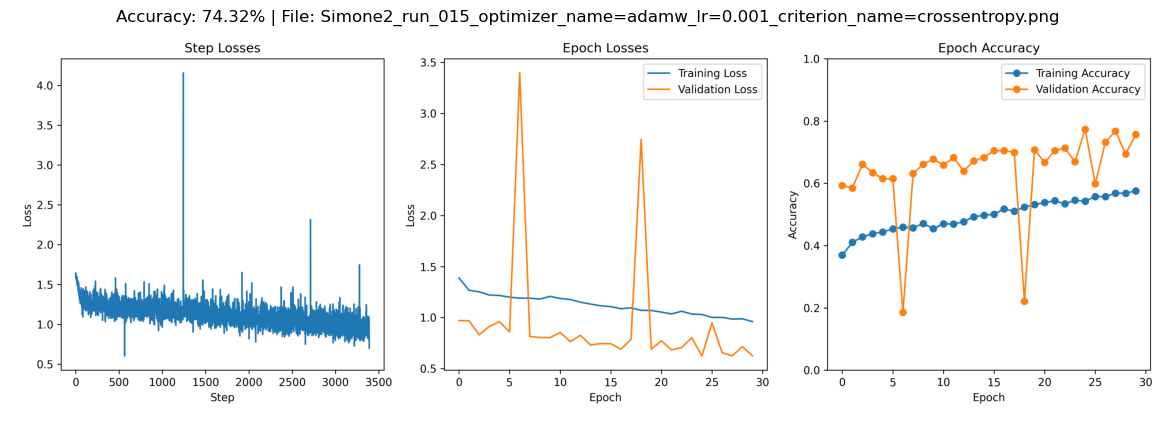

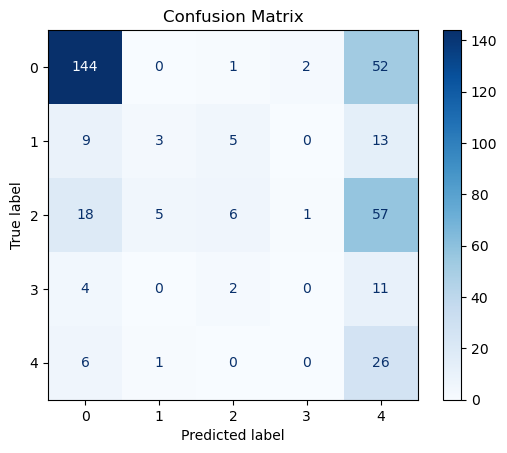

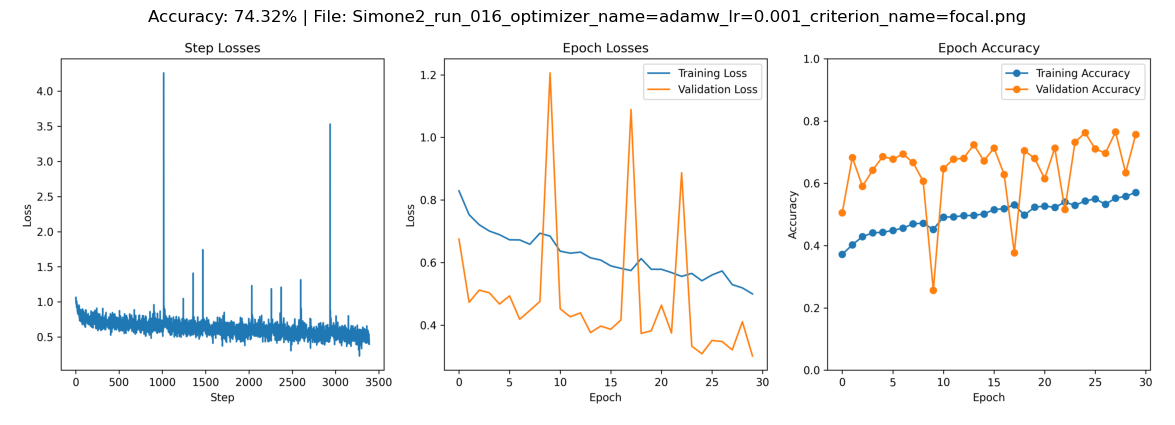

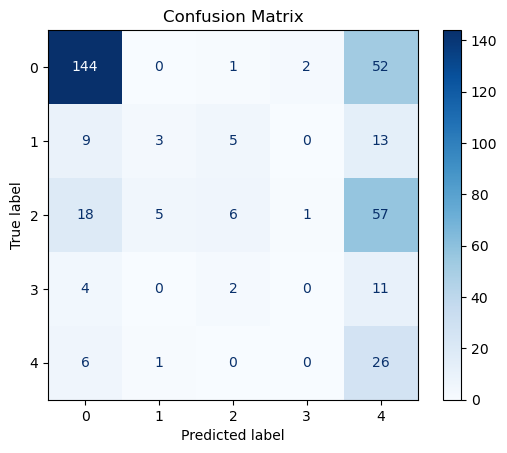

In [118]:
process_csv(csv_path = base_path+"Simone2.csv", threshold = threshold, img_folder = base_path)